In [4]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [10]:
df = pd.read_csv("E:\coffee.csv", parse_dates=['Date'])

df.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2000-01-03,122.25,124.00,116.10,116.50,6640,USD
1,2000-01-04,116.25,120.50,115.75,116.25,5492,USD
2,2000-01-05,115.00,121.00,115.00,118.60,6165,USD
3,2000-01-06,119.00,121.40,116.50,116.85,5094,USD
4,2000-01-07,117.25,117.75,113.80,114.15,6855,USD


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5746 entries, 0 to 5745
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      5746 non-null   datetime64[ns]
 1   Open      5746 non-null   float64       
 2   High      5746 non-null   float64       
 3   Low       5746 non-null   float64       
 4   Close     5746 non-null   float64       
 5   Volume    5746 non-null   int64         
 6   Currency  5746 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 314.4+ KB


In [12]:
# 'Close' is the target variable
# drop 'Currency' column
df.drop(['Currency'], axis=1, inplace=True)

In [13]:
df.describe()

,Open,High,Low,Close,Volume
count,5746.000000,5746.000000,5746.000000,5746.000000,5746.000000
mean,127.267635,128.847034,125.784669,127.215567,8807.178907
std,50.569425,51.164948,49.851487,50.506519,9612.789034
min,41.500000,42.000000,41.500000,41.500000,0.000000
25%,98.800000,100.112500,97.862500,98.650000,61.000000
50%,120.400000,121.600000,118.950000,120.250000,7008.000000
75%,144.800000,146.000000,143.000000,144.337500,14497.750000
max,305.300000,306.250000,304.000000,304.900000,62045.000000


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

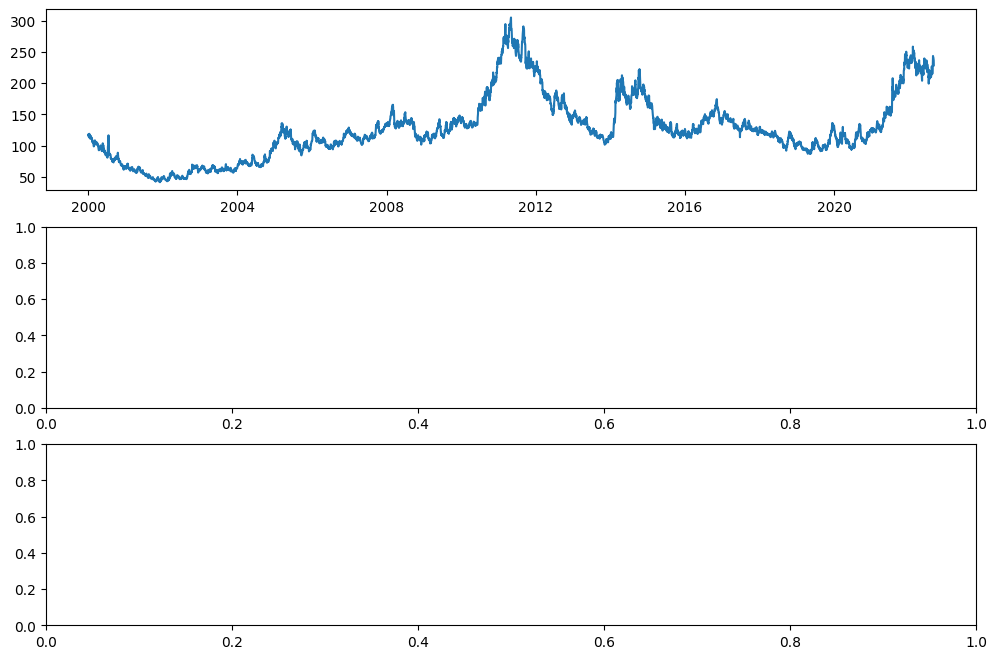

In [15]:
# Resample the data on 'Close' price weekly
sale_weekly = df.resample('W', on='Date').mean()

# Resample the data on 'Close' price monthly
sale_monthly = df.resample('M', on='Date').mean()

# Visualization
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(12,8))

sns.lineplot(x='Date', y='Close', data=df, ax=ax1)
ax1.set_title('Coffee Daily Close Price')

sns.lineplot(x='Date', y='Close', data=sale_weekly, ax=ax2)
ax2.set_title('Coffee Weekly Close Price')

sns.lineplot(x='Date', y='Close', data=sale_monthly, ax=ax3)
ax3.set_title('Coffee Monthly Close Price')

plt.tight_layout()


## Train the model


In [16]:
# Dataset for forecasting
coffee_price = df[['Date','Close']]
coffee_price = coffee_price.rename(columns = {'Date':'ds', 'Close':'y'})

# Splitting train-test sets
train_set = coffee_price[:-365]
test_set = coffee_price[-365:]

# Fit the model to the train data
m = Prophet(yearly_seasonality=True )
m.add_country_holidays(country_name='US')
m.fit(train_set)

NameError: name 'Prophet' is not defined

## Forecast


In [ ]:
# Make a forecast model
prophet_pred = m.predict(test_set)

# Plot the forecast results
pred_plot = m.plot(prophet_pred)
sns.scatterplot(x='ds', y='y', data=test_set, color = 'r', label='True Daily close price')